## What Spotify genres are the most popular?
by: Isabel Hayes

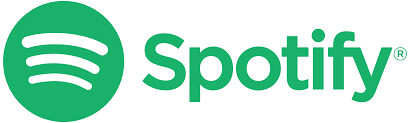

In this notebook, we will be looking at data directly from Spotify in hopes to trace the growth and changes of the most popular podcast genres. The data starts in 2018 and goes to early 2021. We will be looking at the genres that yearly do the best and what overall are the most popular genres for podcasts. We also will be looking at the elements in each genre that are the most common within each year.

In [12]:
from matplotlib import pyplot as plt
import json
from datetime import datetime as dt
import seaborn
import pandas as pd

In [13]:
streamsBm = pd.read_csv(r"C:\Users\ihay0\DataTech\monthly_streams_index.csv")

Adding libraries for the analyst and importing the data from a CSV file

In [14]:
streamsBm.head()

,month,standard_categories_list,index
0,Apr 2019,Arts,0.02287
1,Apr 2019,"Arts, Business, Education",0.00012
2,Apr 2019,"Arts, Business, Health & Fitness",0.00015
3,Apr 2019,"Arts, Business, Society & Culture",0.00214
4,Apr 2019,"Arts, Comedy",0.00673


The data is separated by month and year. Each podcast can have one or more tags naming the genre attached to it. An example of this is that a tag can be a comedy tag or it can be a comedy, true crime tags. Listens have been scaled to be in a range from 0 to 1 so something like .01 would have a greater listen rate than .001.

In [15]:
streamsBm['standard_categories_list']

0                                     Arts
1                Arts, Business, Education
2         Arts, Business, Health & Fitness
3        Arts, Business, Society & Culture
4                             Arts, Comedy
                       ...                
10549                    Sports, TV & Film
10550                           Technology
10551                           True Crime
10552                            TV & Film
10553                TV & Film, True Crime
Name: standard_categories_list, Length: 10554, dtype: object

In [16]:
streamsBm['month']

0        Apr 2019
1        Apr 2019
2        Apr 2019
3        Apr 2019
4        Apr 2019
           ...   
10549    Sep 2020
10550    Sep 2020
10551    Sep 2020
10552    Sep 2020
10553    Sep 2020
Name: month, Length: 10554, dtype: object

Splitting the data frame to have separate columns for year and month

In [17]:
streams= streamsBm.month.str.split(expand=True)

In [18]:
streams.head()

,0,1
0,Apr,2019
1,Apr,2019
2,Apr,2019
3,Apr,2019
4,Apr,2019


Adding the new column to the data frame

In [19]:
streamsBm[['Mon','Year']] = streamsBm['month'].str.split(expand = True)

In [20]:
streamsBm

,month,standard_categories_list,index,Mon,Year
0,Apr 2019,Arts,0.02287,Apr,2019
1,Apr 2019,"Arts, Business, Education",0.00012,Apr,2019
2,Apr 2019,"Arts, Business, Health & Fitness",0.00015,Apr,2019
3,Apr 2019,"Arts, Business, Society & Culture",0.00214,Apr,2019
4,Apr 2019,"Arts, Comedy",0.00673,Apr,2019
...,...,...,...,...,...
10549,Sep 2020,"Sports, TV & Film",0.00220,Sep,2020
10550,Sep 2020,Technology,0.01204,Sep,2020
10551,Sep 2020,True Crime,0.27128,Sep,2020
10552,Sep 2020,TV & Film,0.06240,Sep,2020


Removing the orginal data column because we added the new one

In [21]:
streamsBm.drop('month',inplace=True,axis=1)

In [22]:
streamsBm

,standard_categories_list,index,Mon,Year
0,Arts,0.02287,Apr,2019
1,"Arts, Business, Education",0.00012,Apr,2019
2,"Arts, Business, Health & Fitness",0.00015,Apr,2019
3,"Arts, Business, Society & Culture",0.00214,Apr,2019
4,"Arts, Comedy",0.00673,Apr,2019
...,...,...,...,...
10549,"Sports, TV & Film",0.00220,Sep,2020
10550,Technology,0.01204,Sep,2020
10551,True Crime,0.27128,Sep,2020
10552,TV & Film,0.06240,Sep,2020


##### Splitting the main data frame into separate data frames that are split by the year 

### 2018

In [23]:
year18 = streamsBm[streamsBm['Year'] == '2018']

In [24]:
year18

,standard_categories_list,index,Mon,Year
601,Arts,0.01664,Aug,2018
602,"Arts, Business, Society & Culture",0.00188,Aug,2018
603,"Arts, Comedy",0.00426,Aug,2018
604,"Arts, Comedy, Education, Society & Culture",0.00022,Aug,2018
605,"Arts, Comedy, Fiction",0.00020,Aug,2018
...,...,...,...,...
9859,Sports,0.13889,Sep,2018
9860,"Sports, TV & Film",0.00035,Sep,2018
9861,Technology,0.00063,Sep,2018
9862,True Crime,0.02656,Sep,2018


### 2019

In [25]:
year19 = streamsBm[streamsBm['Year'] == '2019']

In [26]:
year19

,standard_categories_list,index,Mon,Year
0,Arts,0.02287,Apr,2019
1,"Arts, Business, Education",0.00012,Apr,2019
2,"Arts, Business, Health & Fitness",0.00015,Apr,2019
3,"Arts, Business, Society & Culture",0.00214,Apr,2019
4,"Arts, Comedy",0.00673,Apr,2019
...,...,...,...,...
10178,"Sports, TV & Film",0.00065,Sep,2019
10179,Technology,0.00550,Sep,2019
10180,True Crime,0.19690,Sep,2019
10181,TV & Film,0.03553,Sep,2019


### 2020

In [27]:
year20 = streamsBm[streamsBm['Year'] == '2020']
year20

,standard_categories_list,index,Mon,Year
264,Arts,0.07501,Apr,2020
265,"Arts, Business",0.00015,Apr,2020
266,"Arts, Business, Comedy, News, Technology",0.00015,Apr,2020
267,"Arts, Business, Education",0.00024,Apr,2020
268,"Arts, Business, Health & Fitness",0.00019,Apr,2020
...,...,...,...,...
10549,"Sports, TV & Film",0.00220,Sep,2020
10550,Technology,0.01204,Sep,2020
10551,True Crime,0.27128,Sep,2020
10552,TV & Film,0.06240,Sep,2020


### 2021

In [28]:
year21 = streamsBm[streamsBm['Year'] == '2021']
year21

,standard_categories_list,index,Mon,Year
3028,Arts,0.06901,Feb,2021
3029,"Arts, Business",0.00030,Feb,2021
3030,"Arts, Business, Education",0.00069,Feb,2021
3031,"Arts, Business, Health & Fitness",0.00020,Feb,2021
3032,"Arts, Business, Music",0.00156,Feb,2021
...,...,...,...,...
7061,"Sports, TV & Film",0.00274,Mar,2021
7062,Technology,0.03189,Mar,2021
7063,True Crime,0.30550,Mar,2021
7064,TV & Film,0.10623,Mar,2021


After splitting the data up by years they were put in order from the genres with the highest number of listens to the ones with the lowest number of listens.

### 2018

In [29]:
ascen18 = year18.sort_values( by='index', ascending=False)
ascen18.head(10)


,standard_categories_list,index,Mon,Year
1563,Comedy,0.22692,Dec,2018
7896,Comedy,0.21267,Nov,2018
8807,Comedy,0.19624,Oct,2018
666,Comedy,0.17648,Aug,2018
8949,Sports,0.16444,Oct,2018
9723,Comedy,0.16423,Sep,2018
4435,Comedy,0.15934,Jul,2018
8039,Sports,0.15209,Nov,2018
1712,Sports,0.14615,Dec,2018
9859,Sports,0.13889,Sep,2018


<AxesSubplot:>

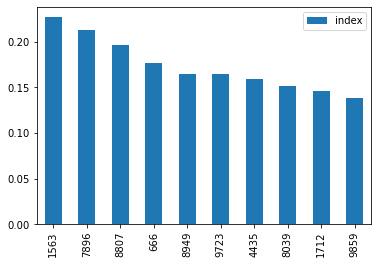

In [30]:
plot18 = ascen18.head(10)
plot18.plot.bar()

#### In 2018 the most common genres were podcasts with comedy or sports

### 2019

In [31]:
ascen19 = year19.sort_values( by='index', ascending=False)
ascen19.head(10)

,standard_categories_list,index,Mon,Year
9064,Comedy,0.59977,Oct,2019
1823,Comedy,0.58725,Dec,2019
8151,Comedy,0.58141,Nov,2019
9242,News,0.57657,Oct,2019
920,Comedy,0.52178,Aug,2019
8330,News,0.50691,Nov,2019
9974,Comedy,0.50473,Sep,2019
10144,News,0.50111,Sep,2019
4678,Comedy,0.48471,Jul,2019
1085,News,0.46095,Aug,2019


<AxesSubplot:>

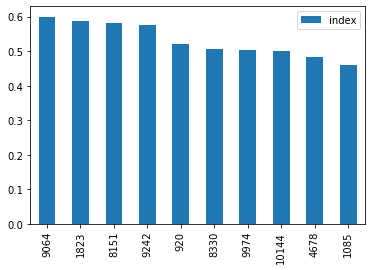

In [39]:
plot19 = ascen19.head(10)
plot19.plot.bar()

#### In 2019 the most common genres for a podcast were ones that conatined comedy or news

### 2020

In [33]:
ascen20 = year20.sort_values( by='index', ascending=False)
ascen20.head(10)

,standard_categories_list,index,Mon,Year
9610,News,1.00000,Oct,2020
8692,News,0.87176,Nov,2020
1237,Comedy,0.87100,Aug,2020
10509,News,0.85720,Sep,2020
4993,Comedy,0.85058,Jul,2020
9398,Comedy,0.83374,Oct,2020
1453,News,0.83320,Aug,2020
2164,Comedy,0.81778,Dec,2020
6630,News,0.79995,Mar,2020
5198,News,0.78405,Jul,2020


<AxesSubplot:>

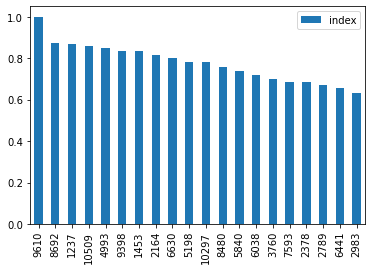

In [34]:
plot20 =ascen20.head(20)
plot20.plot.bar()

#### In 2020 the most common genres were News or comdey. 
#### The years the number of overall listens are much higher 2019 and 2018

### 2021

In [35]:
ascen21 = year21.sort_values( by='index', ascending=False)
ascen21.head(10)

,standard_categories_list,index,Mon,Year
6800,Comedy,0.91384,Mar,2021
4325,News,0.84628,Jan,2021
4110,Comedy,0.82863,Jan,2021
7017,News,0.80905,Mar,2021
3143,Comedy,0.80256,Feb,2021
3355,News,0.74274,Feb,2021
7059,Sports,0.47580,Mar,2021
6865,"Comedy, Society & Culture",0.45534,Mar,2021
4366,Sports,0.43483,Jan,2021
4172,"Comedy, Society & Culture",0.42513,Jan,2021


<AxesSubplot:>

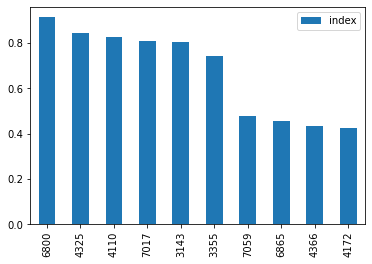

In [36]:
plot21 = ascen21.head(10)
plot21.plot.bar()

#### So far in 2021 the most popular genres have been podcasts with Comedy, News or Sports in them. 

In [37]:
ascenAll = streamsBm.sort_values(by='index', ascending=False)
ascenAll.head(15)

,standard_categories_list,index,Mon,Year
9610,News,1.00000,Oct,2020
6800,Comedy,0.91384,Mar,2021
8692,News,0.87176,Nov,2020
1237,Comedy,0.87100,Aug,2020
10509,News,0.85720,Sep,2020
4993,Comedy,0.85058,Jul,2020
4325,News,0.84628,Jan,2021
9398,Comedy,0.83374,Oct,2020
1453,News,0.83320,Aug,2020
4110,Comedy,0.82863,Jan,2021


<AxesSubplot:>

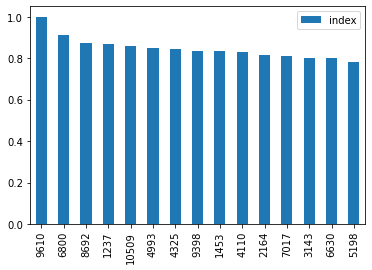

In [38]:
plotAll = ascenAll.head(15)
plotAll.plot.bar()

### Yearly Comparisons

Overall every year the top tens consisted of both comedy and News. The biggest changes for 2018 and 2019 were the positions that they were placed. In 2020 the number of the podcast in the top ten with the news was much higher than comedy. For 2021 sports were in the top ten which is unlike the rest of the years it also had a genre under comedy, society, and culture. 

A reason that 2020 could have a higher number of listens for news than comedy could be the election and people wanting to know more about it. 2021 sports could be higher because the draft just happened and there has been a lot of sports news as sports come back in 2021

### Overall

Overall the most popular genres for podcasts are a combination of comedy or news. These are the genres that have been consistently on the top for the last few years and overall those genres were the only ones in the top 15. So, it is safe to say podcasts with a comedy or a new tag in their genre have a higher percentage of listens than others.